# Introduction

Do higher film budgets lead to more box office revenue? Let's find out if there's a relationship using the movie budgets and financial performance data that I've scraped from [the-numbers.com](https://www.the-numbers.com/movie/budgets) on **May 1st, 2018**. 

<img src=https://i.imgur.com/kq7hrEh.png>

# Import Statements

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

import seaborn as sns


# Notebook Presentation

In [2]:
pd.options.display.float_format = '{:,.2f}'.format

from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

# Read the Data

In [3]:
data = pd.read_csv('cost_revenue_dirty.csv')

# Explore and Clean the Data

**Challenge**: Answer these questions about the dataset:
1. How many rows and columns does the dataset contain?
    - 5391 rows, 6 columns
2. Are there any NaN values present?
    - Negative
3. Are there any duplicate rows?
    - Negative
4. What are the data types of the columns?


| Column Name | Data Type |
| :--- | :--- |
| Rank | int64 |
| Release_Date | object |
| Movie_Title | object |
| USD_Production_Budget | object |
| USD_Worldwide_Gross | object | 
| USD_Domestic_Gross | object |

In [4]:
data.shape

(5391, 6)

In [5]:
data.isna().any(axis=None)

False

In [6]:
data.duplicated().any(axis=None)

False

In [7]:
data.dtypes

Rank                      int64
Release_Date             object
Movie_Title              object
USD_Production_Budget    object
USD_Worldwide_Gross      object
USD_Domestic_Gross       object
dtype: object

### Data Type Conversions

**Challenge**: Convert the `USD_Production_Budget`, `USD_Worldwide_Gross`, and `USD_Domestic_Gross` columns to a numeric format by removing `$` signs and `,`. 
<br>
<br>
Note that *domestic* in this context refers to the United States.

In [8]:
data[data.columns[3:]] = data[data.columns[3:]].replace('[\$,]','', regex=True).astype(float)
data[data.columns[3:]].dtypes

USD_Production_Budget    float64
USD_Worldwide_Gross      float64
USD_Domestic_Gross       float64
dtype: object

**Challenge**: Convert the `Release_Date` column to a Pandas Datetime type. 

In [9]:
data['Release_Date'] = pd.to_datetime(data['Release_Date'])
data.dtypes

Rank                              int64
Release_Date             datetime64[ns]
Movie_Title                      object
USD_Production_Budget           float64
USD_Worldwide_Gross             float64
USD_Domestic_Gross              float64
dtype: object

### Descriptive Statistics

**Challenge**: 

1. What is the average production budget of the films in the data set?
2. What is the average worldwide gross revenue of films?
3. What were the minimums for worldwide and domestic revenue?
4. Are the bottom 25% of films actually profitable or do they lose money?
5. What are the highest production budget and highest worldwide gross revenue of any film?
6. How much revenue did the lowest and highest budget films make?

In [10]:
# 1. What is the average production budget of the films in the data set?
data['USD_Production_Budget'].mean()

31113737.57837136

In [11]:
# 2. What is the average worldwide gross revenue of films?
data['USD_Worldwide_Gross'].mean()

88855421.96271564

In [12]:
# 3. What were the minimums for worldwide and domestic revenue?
data.describe()

,Rank,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross
count,"5,391.00","5,391.00","5,391.00","5,391.00"
mean,"2,696.00","31,113,737.58","88,855,421.96","41,235,519.44"
std,"1,556.39","40,523,796.88","168,457,757.00","66,029,346.27"
min,1.00,"1,100.00",0.00,0.00
25%,"1,348.50","5,000,000.00","3,865,206.00","1,330,901.50"
50%,"2,696.00","17,000,000.00","27,450,453.00","17,192,205.00"
75%,"4,043.50","40,000,000.00","96,454,455.00","52,343,687.00"
max,"5,391.00","425,000,000.00","2,783,918,982.00","936,662,225.00"


In [13]:
def calc_ww_revenue(row):
    revenue = row.USD_Production_Budget-row.USD_Worldwide_Gross
    return revenue

def calc_dom_revenue(row):
    revenue = row.USD_Production_Budget-row.USD_Domestic_Gross
    return revenue

In [14]:
# data['Worldwide_Revenue'] = data.apply(calc_ww_revenue, axis=1)
# data['Domestic_Revenue'] = data.apply(calc_dom_revenue, axis=1)
# data

In [15]:
data.describe()

,Rank,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross
count,"5,391.00","5,391.00","5,391.00","5,391.00"
mean,"2,696.00","31,113,737.58","88,855,421.96","41,235,519.44"
std,"1,556.39","40,523,796.88","168,457,757.00","66,029,346.27"
min,1.00,"1,100.00",0.00,0.00
25%,"1,348.50","5,000,000.00","3,865,206.00","1,330,901.50"
50%,"2,696.00","17,000,000.00","27,450,453.00","17,192,205.00"
75%,"4,043.50","40,000,000.00","96,454,455.00","52,343,687.00"
max,"5,391.00","425,000,000.00","2,783,918,982.00","936,662,225.00"


In [16]:
# 6. How much revenue did the lowest and highest budget films make?
             
data.agg(Lowest_Film=('USD_Production_Budget', min), Highest_Film=('USD_Production_Budget', max))

,USD_Production_Budget
Lowest_Film,"1,100.00"
Highest_Film,"425,000,000.00"


In [17]:
data.sort_values('USD_Production_Budget', ascending=False)[:1]

,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross
3529,1,2009-12-18,Avatar,"425,000,000.00","2,783,918,982.00","760,507,625.00"


In [18]:
highest_budget = data.sort_values('USD_Production_Budget', ascending=False)[:1]
highest_budget_revenue = highest_budget.USD_Worldwide_Gross - highest_budget.USD_Production_Budget
print(f'Highest Budget Revenue: {highest_budget_revenue}')

lowest_budget = data.sort_values('USD_Production_Budget')[:1]
lowest_budget_revenue = lowest_budget.USD_Worldwide_Gross - lowest_budget.USD_Production_Budget
print(f'Lowest Budget Revenue: {lowest_budget_revenue}')

Highest Budget Revenue: 3529   2,358,918,982.00
dtype: float64
Lowest Budget Revenue: 2427   179,941.00
dtype: float64


# Investigating the Zero Revenue Films

**Challenge** How many films grossed $0 domestically (i.e., in the United States)? What were the highest budget films that grossed nothing?

In [19]:
print(len(data[data['USD_Domestic_Gross'] == 0]))
zero_domestic = data[data['USD_Domestic_Gross'] == 0]

512


In [20]:
zero_domestic.sort_values('USD_Production_Budget', ascending=False).head()

,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross
5388,96,2020-12-31,Singularity,"175,000,000.00",0.00,0.00
5387,126,2018-12-18,Aquaman,"160,000,000.00",0.00,0.00
5384,321,2018-09-03,A Wrinkle in Time,"103,000,000.00",0.00,0.00
5385,366,2018-10-08,Amusement Park,"100,000,000.00",0.00,0.00
5090,556,2015-12-31,"Don Gato, el inicio de la pandilla","80,000,000.00","4,547,660.00",0.00


**Challenge**: How many films grossed $0 worldwide? What are the highest budget films that had no revenue internationally?

In [21]:
print(len(data[data['USD_Worldwide_Gross'] == 0]))
zero_worldwide = data[data['USD_Worldwide_Gross'] == 0]
zero_worldwide.sort_values('USD_Production_Budget', ascending=False).head()

357


,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross
5388,96,2020-12-31,Singularity,"175,000,000.00",0.00,0.00
5387,126,2018-12-18,Aquaman,"160,000,000.00",0.00,0.00
5384,321,2018-09-03,A Wrinkle in Time,"103,000,000.00",0.00,0.00
5385,366,2018-10-08,Amusement Park,"100,000,000.00",0.00,0.00
5058,880,2015-11-12,The Ridiculous 6,"60,000,000.00",0.00,0.00


### Filtering on Multiple Conditions

In [22]:
international_releases = data.loc[(data.USD_Domestic_Gross == 0) &
                                  (data.USD_Worldwide_Gross != 0)]

In [23]:
print(f'Number of International Releases: {len(international_releases)}')
international_releases.head()

Number of International Releases: 155


,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross
71,4310,1956-02-16,Carousel,"3,380,000.00","3,220.00",0.00
1579,5087,2001-02-11,Everything Put Together,"500,000.00","7,890.00",0.00
1744,3695,2001-12-31,The Hole,"7,500,000.00","10,834,406.00",0.00
2155,4236,2003-12-31,Nothing,"4,000,000.00","63,180.00",0.00
2203,2513,2004-03-31,The Touch,"20,000,000.00","5,918,742.00",0.00


**Challenge**: Use the [`.query()` function](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.query.html) to accomplish the same thing. Create a subset for international releases that had some worldwide gross revenue, but made zero revenue in the United States. 

Hint: This time you'll have to use the `and` keyword.

In [24]:
international_releases = data.query('USD_Domestic_Gross == 0 and USD_Worldwide_Gross != 0')
international_releases.head()

,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross
71,4310,1956-02-16,Carousel,"3,380,000.00","3,220.00",0.00
1579,5087,2001-02-11,Everything Put Together,"500,000.00","7,890.00",0.00
1744,3695,2001-12-31,The Hole,"7,500,000.00","10,834,406.00",0.00
2155,4236,2003-12-31,Nothing,"4,000,000.00","63,180.00",0.00
2203,2513,2004-03-31,The Touch,"20,000,000.00","5,918,742.00",0.00


### Unreleased Films

**Challenge**:
* Identify which films were not released yet as of the time of data collection (May 1st, 2018).
* How many films are included in the dataset that have not yet had a chance to be screened in the box office? 
* Create another DataFrame called data_clean that does not include these films. 

In [25]:
# Date of Data Collection
scrape_date = pd.Timestamp('2018-5-1')

In [26]:
films_not_released = data[data['Release_Date'] >= scrape_date]
films_not_released.head()

,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross
5384,321,2018-09-03,A Wrinkle in Time,"103,000,000.00",0.00,0.00
5385,366,2018-10-08,Amusement Park,"100,000,000.00",0.00,0.00
5386,2950,2018-10-08,Meg,"15,000,000.00",0.00,0.00
5387,126,2018-12-18,Aquaman,"160,000,000.00",0.00,0.00
5388,96,2020-12-31,Singularity,"175,000,000.00",0.00,0.00


In [27]:
films_not_released.describe()

,Rank,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross
count,7.00,7.00,7.00,7.00
mean,"1,070.71","89,000,000.00",0.00,0.00
std,"1,192.13","63,916,612.34",0.00,0.00
min,96.00,"15,000,000.00",0.00,0.00
25%,223.50,"35,000,000.00",0.00,0.00
50%,366.00,"100,000,000.00",0.00,0.00
75%,"1,818.00","131,500,000.00",0.00,0.00
max,"2,950.00","175,000,000.00",0.00,0.00


In [28]:
# df1.drop(df2.index, axis=0,inplace=True)

data_clean = data.drop(films_not_released.index)

data_clean.head()

,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross
0,5293,1915-08-02,The Birth of a Nation,"110,000.00","11,000,000.00","10,000,000.00"
1,5140,1916-05-09,Intolerance,"385,907.00",0.00,0.00
2,5230,1916-12-24,"20,000 Leagues Under the Sea","200,000.00","8,000,000.00","8,000,000.00"
3,5299,1920-09-17,Over the Hill to the Poorhouse,"100,000.00","3,000,000.00","3,000,000.00"
4,5222,1925-01-01,The Big Parade,"245,000.00","22,000,000.00","11,000,000.00"


### Films that Lost Money

**Challenge**: 
What is the percentage of films where the production costs exceeded the worldwide gross revenue? 

In [29]:
total_film_count = len(data_clean)
costly_film_count = len(data_clean.query('USD_Production_Budget > USD_Worldwide_Gross'))

print(float(costly_film_count)/float(total_film_count))

0.37277117384843983


# Seaborn for Data Viz: Bubble Charts

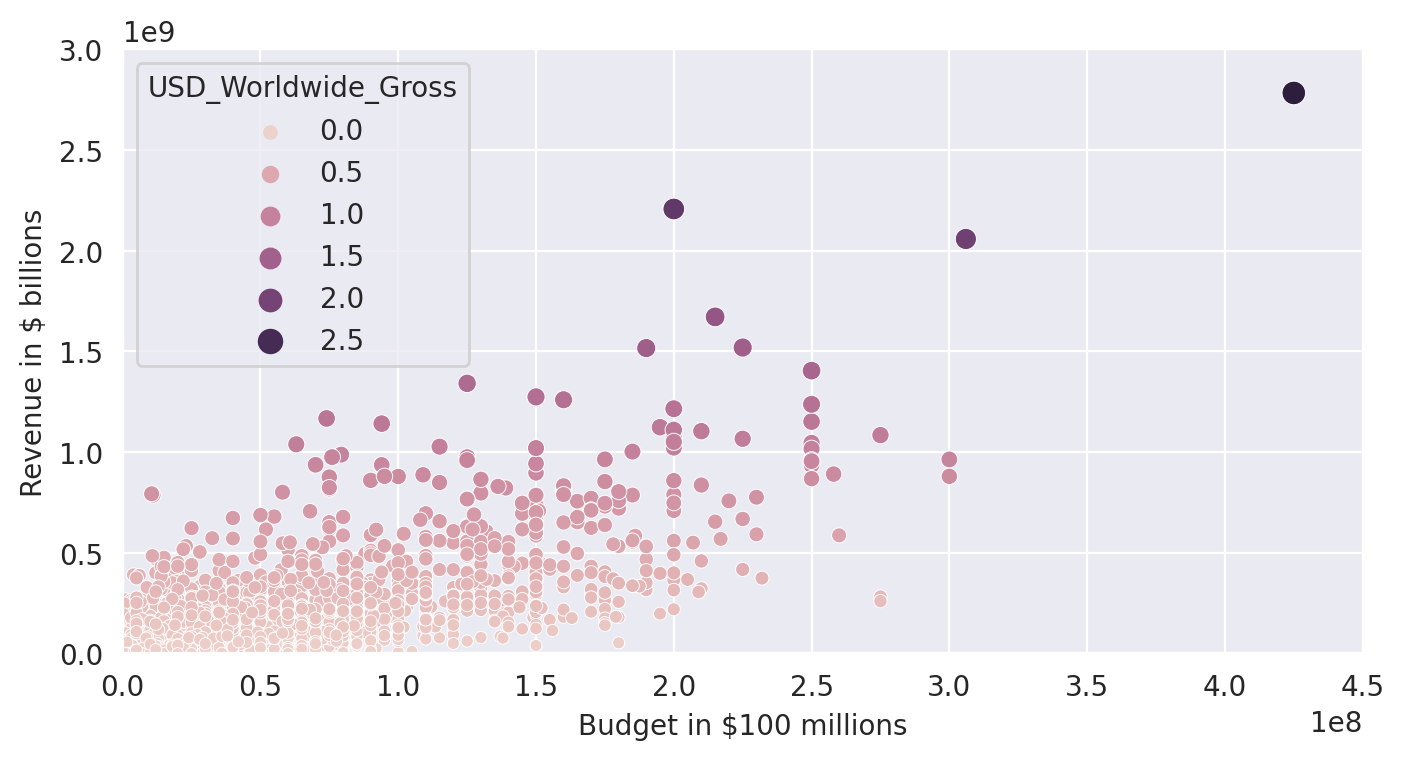

In [30]:
plt.figure(figsize=(8,4), dpi=200)

# set styling on a single chart
with sns.axes_style('darkgrid'):
  ax = sns.scatterplot(data=data_clean,
                       x='USD_Production_Budget', 
                       y='USD_Worldwide_Gross',
                       hue='USD_Worldwide_Gross',
                       size='USD_Worldwide_Gross')

  ax.set(ylim=(0, 3000000000),
        xlim=(0, 450000000),
        ylabel='Revenue in $ billions',
        xlabel='Budget in $100 millions')

### Plotting Movie Releases over Time

**Challenge**: Try to create the following Bubble Chart:

<img src=https://i.imgur.com/8fUn9T6.png>



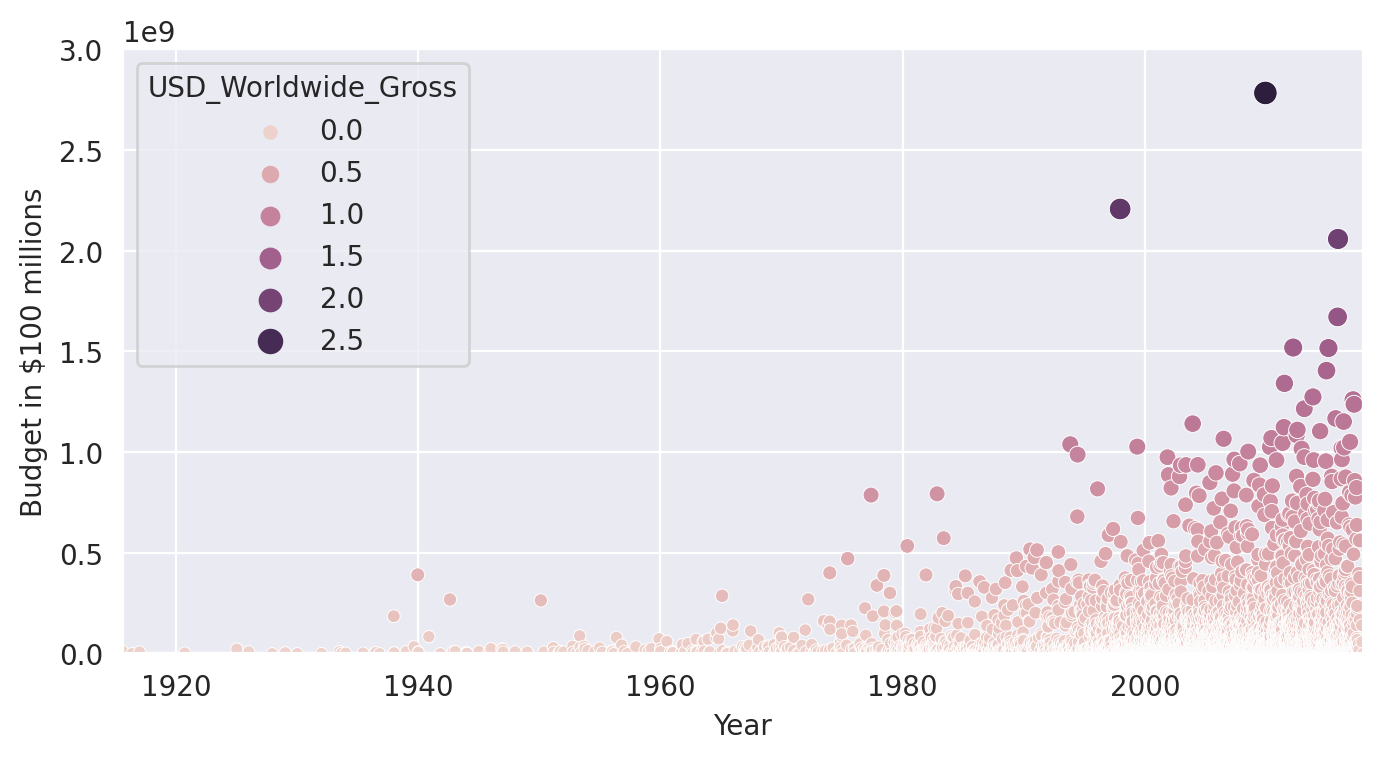

In [31]:
plt.figure(figsize=(8,4), dpi=200)

# set styling on a single chart
with sns.axes_style('darkgrid'):
  ax = sns.scatterplot(data=data_clean,
                       x='Release_Date', 
                       y='USD_Worldwide_Gross',
                       hue='USD_Worldwide_Gross',
                       size='USD_Worldwide_Gross')

  ax.set(ylim=(0, 3000000000),
        xlim=(data_clean.Release_Date.min(), data_clean.Release_Date.max()),
        ylabel='Budget in $100 millions',
        xlabel='Year')

# Converting Years to Decades Trick

**Challenge**: Create a column in `data_clean` that has the decade of the release. 

<img src=https://i.imgur.com/0VEfagw.png width=650> 

Here's how: 
1. Create a [`DatetimeIndex` object](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DatetimeIndex.html) from the Release_Date column. 
2. Grab all the years from the `DatetimeIndex` object using the `.year` property.
<img src=https://i.imgur.com/5m06Ach.png width=650>
3. Use floor division `//` to convert the year data to the decades of the films.
4. Add the decades as a `Decade` column to the `data_clean` DataFrame.

In [32]:
test = data_clean
test["Decade"] = (pd.DatetimeIndex(test.Release_Date).year // 10) * 10
test

,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross,Decade
0,5293,1915-08-02,The Birth of a Nation,"110,000.00","11,000,000.00","10,000,000.00",1910
1,5140,1916-05-09,Intolerance,"385,907.00",0.00,0.00,1910
2,5230,1916-12-24,"20,000 Leagues Under the Sea","200,000.00","8,000,000.00","8,000,000.00",1910
3,5299,1920-09-17,Over the Hill to the Poorhouse,"100,000.00","3,000,000.00","3,000,000.00",1920
4,5222,1925-01-01,The Big Parade,"245,000.00","22,000,000.00","11,000,000.00",1920
...,...,...,...,...,...,...,...
5379,1295,2017-10-02,John Wick: Chapter Two,"40,000,000.00","166,893,990.00","92,029,184.00",2010
5380,70,2017-10-03,Kong: Skull Island,"185,000,000.00","561,137,727.00","168,052,812.00",2010
5381,94,2017-12-05,King Arthur: Legend of the Sword,"175,000,000.00","140,012,608.00","39,175,066.00",2010
5382,1254,2017-12-05,Snatched,"42,000,000.00","57,850,343.00","45,850,343.00",2010


In [33]:
data_clean["Decade"] = (pd.DatetimeIndex(test.Release_Date).year // 10) * 10

### Separate the "old" (before 1969) and "New" (1970s onwards) Films

**Challenge**: Create two new DataFrames: `old_films` and `new_films`
* `old_films` should include all the films before 1969 (up to and including 1969)
* `new_films` should include all the films from 1970 onwards
* How many films were released prior to 1970?
* What was the most expensive film made prior to 1970?

In [37]:
data_clean.query('Decade < 1970')

,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross,Decade
0,5293,1915-08-02,The Birth of a Nation,"110,000.00","11,000,000.00","10,000,000.00",1910
1,5140,1916-05-09,Intolerance,"385,907.00",0.00,0.00,1910
2,5230,1916-12-24,"20,000 Leagues Under the Sea","200,000.00","8,000,000.00","8,000,000.00",1910
3,5299,1920-09-17,Over the Hill to the Poorhouse,"100,000.00","3,000,000.00","3,000,000.00",1920
4,5222,1925-01-01,The Big Parade,"245,000.00","22,000,000.00","11,000,000.00",1920
...,...,...,...,...,...,...,...
148,2375,1969-10-15,Paint Your Wagon,"20,000,000.00","31,678,778.00","31,678,778.00",1960
149,3831,1969-10-24,Butch Cassidy and the Sundance Kid,"6,000,000.00","102,308,900.00","102,308,900.00",1960
150,2175,1969-12-16,"Hello, Dolly","24,000,000.00","33,208,099.00","33,208,099.00",1960
151,3613,1969-12-18,On Her Majesty's Secret Service,"8,000,000.00","82,000,000.00","22,800,000.00",1960


In [42]:
new_films = data_clean.drop(data_clean.query('Decade <= 1960').index)
old_films = data_clean.drop(data_clean.query('Decade > 1960').index)

In [43]:
old_films.head()

,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross,Decade
0,5293,1915-08-02,The Birth of a Nation,"110,000.00","11,000,000.00","10,000,000.00",1910
1,5140,1916-05-09,Intolerance,"385,907.00",0.00,0.00,1910
2,5230,1916-12-24,"20,000 Leagues Under the Sea","200,000.00","8,000,000.00","8,000,000.00",1910
3,5299,1920-09-17,Over the Hill to the Poorhouse,"100,000.00","3,000,000.00","3,000,000.00",1920
4,5222,1925-01-01,The Big Parade,"245,000.00","22,000,000.00","11,000,000.00",1920


In [44]:
new_films.head()

,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross,Decade
153,2159,1970-01-01,Waterloo,"25,000,000.00",0.00,0.00,1970
154,2270,1970-01-01,Darling Lili,"22,000,000.00","5,000,000.00","5,000,000.00",1970
155,3136,1970-01-01,Patton,"12,000,000.00","62,500,000.00","62,500,000.00",1970
156,3277,1970-01-01,The Molly Maguires,"11,000,000.00","2,200,000.00","2,200,000.00",1970
157,4265,1970-01-01,M*A*S*H,"3,500,000.00","81,600,000.00","81,600,000.00",1970


In [47]:
# How many films were released prior to 1970?
old_films.describe() # 153

# What was the most expensive film made prior to 1970?
# $42,000,000.00

,Rank,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross,Decade
count,153.00,153.00,153.00,153.00,153.00
mean,"4,274.77","4,611,297.65","30,419,634.38","22,389,473.87","1,949.15"
std,742.14,"5,713,648.85","54,931,828.93","32,641,752.41",12.72
min,"1,253.00","100,000.00",0.00,0.00,"1,910.00"
25%,"3,973.00","1,250,000.00","5,273,000.00","5,000,000.00","1,940.00"
50%,"4,434.00","2,900,000.00","10,000,000.00","10,000,000.00","1,950.00"
75%,"4,785.00","5,000,000.00","33,208,099.00","28,350,000.00","1,960.00"
max,"5,299.00","42,000,000.00","390,525,192.00","198,680,470.00","1,960.00"


In [48]:
old_films.sort_values('USD_Production_Budget', ascending=False)

,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross,Decade
109,1253,1963-12-06,Cleopatra,"42,000,000.00","71,000,000.00","57,000,000.00",1960
150,2175,1969-12-16,"Hello, Dolly","24,000,000.00","33,208,099.00","33,208,099.00",1960
143,2465,1969-01-01,Sweet Charity,"20,000,000.00","8,000,000.00","8,000,000.00",1960
118,2425,1965-02-15,The Greatest Story Ever Told,"20,000,000.00","15,473,333.00","15,473,333.00",1960
148,2375,1969-10-15,Paint Your Wagon,"20,000,000.00","31,678,778.00","31,678,778.00",1960
...,...,...,...,...,...,...,...
147,5228,1969-07-25,The Stewardesses,"200,000.00","25,000,000.00","13,500,000.00",1960
29,5283,1942-11-16,Cat People,"134,000.00","8,000,000.00","4,000,000.00",1940
135,5292,1968-01-10,Night of the Living Dead,"114,000.00","30,000,000.00","12,000,000.00",1960
0,5293,1915-08-02,The Birth of a Nation,"110,000.00","11,000,000.00","10,000,000.00",1910


# Seaborn Regression Plots

**Challenge**: Use Seaborn's `.regplot()` to show the scatter plot and linear regression line against the `new_films`. 
<br>
<br>
Style the chart

* Put the chart on a `'darkgrid'`.
* Set limits on the axes so that they don't show negative values.
* Label the axes on the plot "Revenue in \$ billions" and "Budget in \$ millions".
* Provide HEX colour codes for the plot and the regression line. Make the dots dark blue (#2f4b7c) and the line orange (#ff7c43).

Interpret the chart

* Do our data points for the new films align better or worse with the linear regression than for our older films?
* Roughly how much would a film with a budget of $150 million make according to the regression line?

# Run Your Own Regression with scikit-learn

$$ REV \hat ENUE = \theta _0 + \theta _1 BUDGET$$

**Challenge**: Run a linear regression for the `old_films`. Calculate the intercept, slope and r-squared. How much of the variance in movie revenue does the linear model explain in this case?

# Use Your Model to Make a Prediction

We just estimated the slope and intercept! Remember that our Linear Model has the following form:

$$ REV \hat ENUE = \theta _0 + \theta _1 BUDGET$$

**Challenge**:  How much global revenue does our model estimate for a film with a budget of $350 million? 